<a href="https://colab.research.google.com/github/jaanvi02/fake_news_prediction/blob/main/fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# as computer can not read textor characters that's why we need  preprocessing

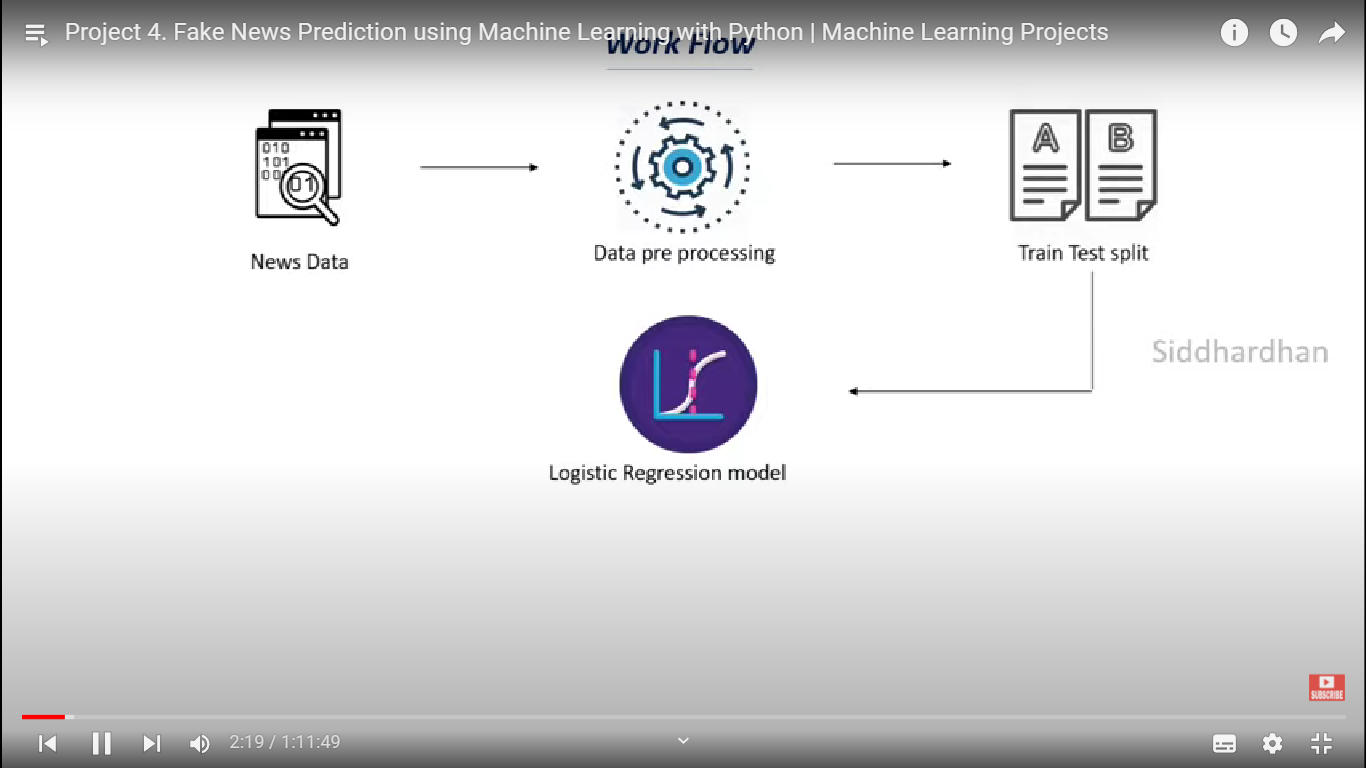

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

data preprocessing


In [ ]:
news_dataset=pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False)




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 5762: unexpected end of data


In [ ]:
news_dataset.shape

(5760, 5)

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#counting missing values in dataset
news_dataset.isnull().sum()

id          0
title     160
author    561
text       12
label       0
dtype: int64

In [ ]:
#replacing null string with empty string
news_dataset=news_dataset.fillna('')

In [ ]:
# merging title and author for prediction
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'] )

0       Darrell Lucus House Dem Aide: We Didn’t Even S...
1       Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2       Consortiumnews.com Why the Truth Might Get You...
3       Jessica Purkiss 15 Civilians Killed In Single ...
4       Howard Portnoy Iranian woman jailed for fictio...
                              ...                        
5755    Adam Kirsch Lie to Me: Fiction in the Post-Tru...
5756    Trent Baker Gingrich: ’Congress Should Now Int...
5757    Michael W. Chapman Christians Martyred by ISIS...
5758     BREAKING: ILLEGAL ALIEN CAUSES $61 MILLION IN...
5759    Howard Portnoy Lonely men are increasingly tur...
Name: content, Length: 5760, dtype: object


In [ ]:
#seperating the data and label
X=news_dataset.drop(columns='label',axis=1)
Y=news_dataset['label']
print(X)
print(Y)

        id                                              title  \
0        0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1        1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2        2                  Why the Truth Might Get You Fired   
3        3  15 Civilians Killed In Single US Airstrike Hav...   
4        4  Iranian woman jailed for fictional unpublished...   
...    ...                                                ...   
5755  5755  Lie to Me: Fiction in the Post-Truth Era - The...   
5756  5756  Gingrich: ’Congress Should Now Intervene and S...   
5757  5757                 Christians Martyred by ISIS: 1,131   
5758  5758  BREAKING: ILLEGAL ALIEN CAUSES $61 MILLION IN ...   
5759  5759  Lonely men are increasingly turning to Siri fo...   

                  author                                               text  \
0          Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...   
1        Daniel J. Flynn  Ever get the feeling your life circ

In [ ]:
#stemming procedure

stemming : process of reducing a word to its root node
the extra suffix and prefix word will be reomved
example: actress, acting-->act

In [ ]:
port_stem=PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) #removes everything which is not an alphabet replaced by a space
    stemmed_content = stemmed_content.lower() # to make all text lower
    stemmed_content = stemmed_content.split() #converting to list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #removing stopwords
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'] )

0       darrel lucu hous dem aid even see comey letter...
1       daniel j flynn flynn hillari clinton big woman...
2                  consortiumnew com truth might get fire
3       jessica purkiss civilian kill singl us airstri...
4       howard portnoy iranian woman jail fiction unpu...
                              ...                        
5755    adam kirsch lie fiction post truth era new yor...
5756    trent baker gingrich congress interven abolish...
5757               michael w chapman christian martyr isi
5758    break illeg alien caus million damag deport ti...
5759    howard portnoy lone men increasingli turn siri...
Name: content, Length: 5760, dtype: object


In [ ]:
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael w chapman christian martyr isi'
 'break illeg alien caus million damag deport time trump piss'
 'howard portnoy lone men increasingli turn siri love sexual explicit chat']


In [ ]:
# as the machine can not understand the text that's why we need to convert it in significant values
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
#tf - text frequency -> value of a word on the basis of frequency
#idf- inverse frequency documen-> the number has been repeated so many times that it is insignificant
X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 8827)	0.28491471295678095
  (0, 7556)	0.2586141082400362
  (0, 5058)	0.3368709705486221
  (0, 4900)	0.2981171282223026
  (0, 4382)	0.25013415278316015
  (0, 4002)	0.22342763448996528
  (0, 2843)	0.24090501967033726
  (0, 2185)	0.26914709896702566
  (0, 2076)	0.3368709705486221
  (0, 1708)	0.25013415278316015
  (0, 1437)	0.3915866289919257
  (0, 167)	0.2779115895439419
  (1, 9392)	0.2941395385358725
  (1, 3903)	0.18956731216893052
  (1, 3167)	0.7155865089271165
  (1, 2058)	0.27277084097449766
  (1, 1617)	0.19101303330350056
  (1, 1296)	0.3846751049628178
  (1, 1101)	0.15263191480607674
  (1, 875)	0.2886533663326826
  (2, 8787)	0.4204419444019978
  (2, 5439)	0.4929359754314247
  (2, 3429)	0.3424120197727327
  (2, 3097)	0.38006820855495976
  (2, 1801)	0.46338291210080723
  :	:
  (5757, 5244)	0.5388481596116762
  (5757, 4325)	0.37424250027004474
  (5757, 1537)	0.40795213248897916
  (5757, 1461)	0.5643712487317285
  (5758, 8779)	0.14666085966805206
  (5758, 8593)	0.11663757206024573
 

In [ ]:
#train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9776475694444444


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9427083333333334


In [ ]:
X_new = X_test[7]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [ ]:
print(Y_test[7])

0
